## Imports

In [1]:
# from class_source.idata_client import IData
from idmmonitor import IData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## API Code

In [2]:
# Variables to use
API_KEY = "58F2Z-RBUEV-6AJ4T-SL3IC"
print(API_KEY)

# initialise
idata = IData()
# echo request information on
#idata.set_verbose(True)

#Store the API Key in the package
idata.set_api_key(API_KEY)


result = idata.get_user_favorites()
if (result is None):
    print("Could not get the user datasources. Check terminal for errors.")
else:
    print(result)

print('')
print("End...")

58F2Z-RBUEV-6AJ4T-SL3IC

{'Metadata': {'Datasets': 29, 'Updated': '2021-12-18T16:58:39Z', 'TimeStamp': 2459567.2074, 'Page': 1, 'PageCount': 1, 'Rows': 29}, 'Datasets': [{'Datasource': 'ECBFX', 'Symbol': 'EURGBP', 'Name': 'ECB - Euro vs Pound Sterling', 'Description': 'European Central Bank exchange rate for Euro vs Pound Sterling (EUR/GBP)', 'Frequency': 'Day', 'Currency': None, 'Unit': None, 'Decimals': None, 'Bates': ['Close'], 'BateIndex': [0], 'StartDate': '1999-01-04', 'EndDate': '2021-12-30', 'Values': 5941, 'Corrections': 0, 'Premium': False, 'Favorite': True, 'IsCategoryDS': False, 'Subscription': 'Active', 'Logo': 'http://adm-gui.intdatamedia.com/datasources/ECBLA.png', 'Status': 200, 'Details': 'OK'}, {'Datasource': 'ECBFX', 'Symbol': 'EURCNY', 'Name': 'ECB - Euro vs Chinese yuan Renminbi', 'Description': 'European Central Bank exchange rate for Euro vs Chinese yuan Renminbi (EUR/CNY)', 'Frequency': 'Day', 'Currency': None, 'Unit': None, 'Decimals': None, 'Bates': ['Close'],

## Get_User_Favorites()

In [3]:
result_1 = idata.get_dataset_values_rc([{"Datasource":"ECBFX","Symbol":"EURGBP"}, {"Datasource":"ECBFX","Symbol":"EURUSD"}])


-----------------------------------
POST
URL: 
https://api.idatamedia.org/
API: 
GetValuesRC
Payload: 
{'SessionToken': 'bf26360c02c8619b167f24a6b8d9cb64', 'Series': [{'Datasource': 'ECBFX', 'Symbol': 'EURGBP'}, {'Datasource': 'ECBFX', 'Symbol': 'EURUSD'}], 'StartDate': 'Earliest', 'EndDate': 'Latest', 'Periods': 0, 'CommonStart': 'false', 'CommonEnd': 'false', 'CommonUA': 'true', 'DateFormat': 'YYYY-MM-DD', 'DateOrder': 'asc', 'Prefill': 'false', 'Fill': 'false', 'Frequency': 'd', 'Postfill': 'false', 'Rounding': 'auto', 'ReturnMetadata': 'false', 'ReturnAccess': 'false', 'ReturnParameters': 'false'}



Functions that help ous access the data.

In [4]:
def get_daily_data(dictionary):

    columns = dictionary['Columns']
    rows = dictionary['Rows']
    corrections = dictionary['Corrections']
    df = pd.DataFrame(rows.values(), columns = [columns[0]['Name'], columns[1]['Name']], index = rows.keys())
    df = df.reset_index()
    df.rename(columns = {'index':'Date'}, inplace = True)
    df.dropna(axis = 0, inplace = True)
    df["Date"] = pd.to_datetime(df['Date'])
    df.insert(1, 'Year', df.Date.dt.year)
    df.insert(2, 'Month', df.Date.dt.month)

    return df

def get_averages(df):
    theList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    theList_upd = {i+1:word for i,word in enumerate(theList)}

    df = df.groupby(['Year', 'Month'], as_index= False).agg({"ECB - Euro vs Pound Sterling": np.mean, "ECB - Euro vs US Dollar":np.mean})
    df['Month'] = df['Month'].replace(theList_upd)
    df.rename(columns = {"ECB - Euro vs Pound Sterling": "ECB - Euro vs Pound Sterling Mean", "ECB - Euro vs US Dollar": "ECB - Euro vs US Dollar Mean"}, inplace = True)
    return df

def get_processed(df):
    theList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    eurgbp = df.iloc[:, :-1]
    eurusd = df.drop(columns = ['ECB - Euro vs Pound Sterling Mean'], axis = 1)
    datas = [eurgbp, eurusd]
    for num, data in enumerate(datas):    
        temp = []
        for i in range(0, len(data), 12):
            lists = data.iloc[i:i+12, -1].values.tolist()
            temp.append(lists)
        datas[num] = pd.DataFrame(temp, columns = theList, index = data.Year.unique().tolist()).round(3)
    datas = tuple(datas)
    
    return datas

Retrieving the data.


In [14]:
dataframe = get_daily_data(result_1)
dataframe.head(10)

,Date,Year,Month,ECB - Euro vs Pound Sterling,ECB - Euro vs US Dollar
0,1999-01-04,1999,1,0.71110,1.1789
1,1999-01-05,1999,1,0.71220,1.1790
2,1999-01-06,1999,1,0.70760,1.1743
3,1999-01-07,1999,1,0.70585,1.1632
4,1999-01-08,1999,1,0.70940,1.1659
7,1999-01-11,1999,1,0.70440,1.1569
8,1999-01-12,1999,1,0.70660,1.1520
9,1999-01-13,1999,1,0.70840,1.1744
10,1999-01-14,1999,1,0.70620,1.1653
11,1999-01-15,1999,1,0.70390,1.1626


The methods we will use require our data to be a Time-Series. That means the index of our Data-Frame has to be of type datetime. Also our data is recorded on bussiness days only, so we set frequency to "b", which means bussiness days.

In [16]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"])
dataframe.set_index("Date", inplace=True)
dataframe = dataframe.asfreq('b')
dataframe = dataframe.fillna(method='ffill')

One of the requirements of a simple AR model is stationary data. This property is tested by the Dicky-Fuller test.

In [18]:
import statsmodels.tsa.stattools as sts 

sts.adfuller(dataframe["ECB - Euro vs Pound Sterling"])

(-1.4441103283784626,
 0.5609560708479588,
 22,
 5976,
 {'1%': -3.4314447307775278,
  '5%': -2.8620237700170423,
  '10%': -2.567027508374641},
 -48980.66727431904)

The result of test is not significant, therefore the data is not stationary. We should convert it to daily returns, that is the percentage difference between today and yesterday. 

In [20]:
dataframe['returns'] = dataframe["ECB - Euro vs Pound Sterling"].pct_change(1).mul(100)
dataframe = dataframe.iloc[1:]

sts.adfuller(dataframe["returns"])

(-16.84205526013798,
 1.1360662551672348e-29,
 21,
 5975,
 {'1%': -3.4314449140748717,
  '5%': -2.8620238510026437,
  '10%': -2.567027551485443},
 8668.031977484556)

This result is significant, therefore the data is stationary and apropriate for the AR model. We run the ACF/PCF tests to determine the significance of specific lags.

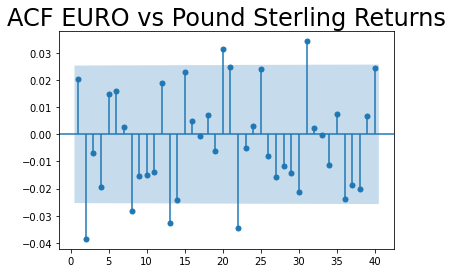

In [23]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(dataframe["returns"], lags=40, zero = False)
plt.title("ACF EURO vs Pound Sterling Returns", size=24)
plt.show()

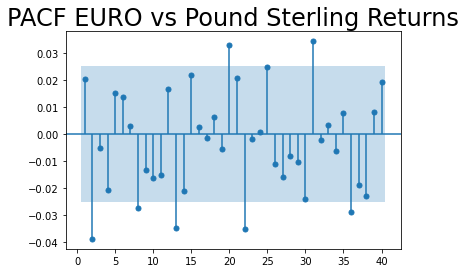

In [24]:
sgt.plot_pacf(dataframe["returns"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF EURO vs Pound Sterling Returns", size=24)
plt.show()

The ACF and PACF appear very similar. This is because we are using returns, which remove the compound effects, which are normally detected by the ACF.

We also observe the first lag is not significant, but the second one is.

In [27]:
from statsmodels.tsa.arima_model import ARMA

model_ret_ar_1 = ARMA(dataframe["returns"], order = (1,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5997
Model:                     ARMA(1, 0)   Log Likelihood               -4356.959
Method:                       css-mle   S.D. of innovations              0.500
Date:                Thu, 30 Dec 2021   AIC                           8719.919
Time:                        14:32:27   BIC                           8740.016
Sample:                    01-06-1999   HQIC                          8726.898
                         - 12-30-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0040      0.007      0.605      0.545      -0.009       0.017
ar.L1.returns     0.0205      0.013      1.586      0.113      -0.005       0.046
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           48.8440           +0.0000j           48.8440            0.0000
-----------------------------------------------------------------------------
"""

As we see none of the coefficients are significant. Adding the second lag should change this.

In [29]:
model_ret_ar_2 = ARMA(dataframe["returns"], order = (2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5997
Model:                     ARMA(2, 0)   Log Likelihood               -4352.411
Method:                       css-mle   S.D. of innovations              0.500
Date:                Thu, 30 Dec 2021   AIC                           8712.823
Time:                        14:33:15   BIC                           8739.619
Sample:                    01-06-1999   HQIC                          8722.129
                         - 12-30-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0040      0.006      0.630      0.529      -0.008       0.016
ar.L1.returns     0.0213      0.013      1.648      0.099      -0.004       0.047
ar.L2.returns    -0.0389      0.013     -3.017      0.003      -0.064      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2731           -5.0608j            5.0681           -0.2414
AR.2            0.2731           +5.0608j            5.0681            0.2414
-----------------------------------------------------------------------------
"""

We see the second lag is significant. The first and the constant are not, which means they are skipped by the model.

We can then make out of sample predictions with the forecast function. The first element is the forecast, followed by standard error and confidence intervals.

In [32]:
results_ret_ar_2.forecast(steps=1, exog=None, alpha=0.05)

(array([0.00086697]), array([0.49998657]), array([[-0.97908871,  0.98082264]]))